In [1]:
from inputs import customers, depots, vehicle_weight
from models import SMAVRP, GeneticAgent, RSAgent, TabouAgent, Client
import random as rd
from tqdm.notebook import trange
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

customers = [Client(i, *row) for i, row in enumerate(rd.sample(customers, 50))]

result_df = pd.DataFrame()

c:\Users\jules\AppData\Local\Programs\Python\Python311\Lib\site-packages\mesa\time.py:82: FutureWarning: The AgentSet is experimental. It may be changed or removed in any and all future releases, including patch releases.
We would love to hear what you think about this new feature. If you have any thoughts, share them with us here: https://github.com/projectmesa/mesa/discussions/1919
  self._agents: AgentSet = AgentSet(agents, model)


  0%|          | 0/150 [00:00<?, ?it/s]

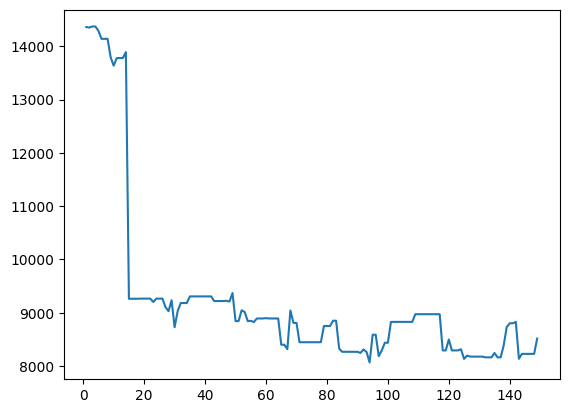

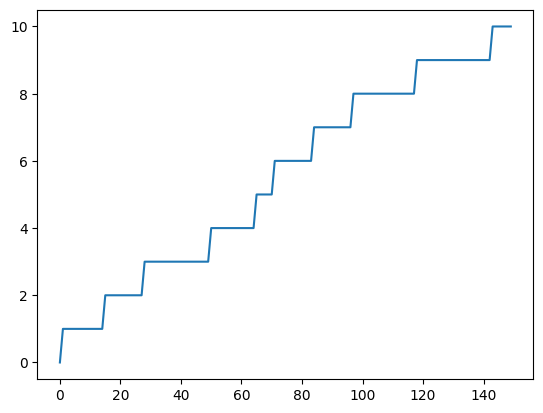

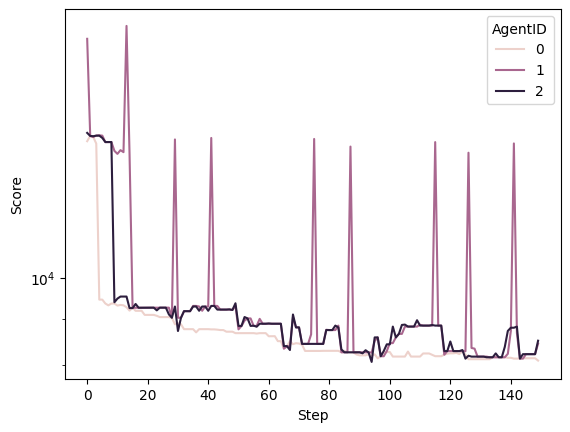

In [2]:


cout_vehicule = rd.uniform(0, 100)

gen_pop_size = rd.randint(4, 15)
Pcross = rd.uniform(0,1)
Pmut = rd.uniform(0,1)

rs_pop_size = rd.randint(4, 15)
t0 = rd.uniform(0,100)
cooling = rd.uniform(0, 0.001)
nb_iter = rd.randint(5,10)

tabou_pop_size = rd.randint(4, 15)
tabou_size = rd.randint(5,10)
tabou_neighbors = rd.randint(5,10)



sma = SMAVRP(customers, depots[0], vehicle_weight, cout_vehicule, Pmut)

sma.add_agent(GeneticAgent(0,sma, 100, 0.8))
sma.add_agent(RSAgent(1, sma, rs_pop_size, t0, cooling))
sma.add_agent(TabouAgent(2, sma, tabou_pop_size, tabou_size, tabou_neighbors))


for i in trange(150):
    sma.step()

sma.datacollector.get_model_vars_dataframe().best_solution.plot(kind="line")
plt.figure()
sma.datacollector.get_model_vars_dataframe().pool_size.plot(kind="line")
plt.figure()
sns.lineplot(data =sma.datacollector.get_agent_vars_dataframe(), x = "Step", y = "Score", hue = "AgentID")
plt.yscale('log')

result_df = pd.concat([result_df, pd.DataFrame({
    'gen_pop_size' : [gen_pop_size],
    'Pcross' : [Pcross],
    'Pmut' : [Pmut],
    'rs_pop_size' : [rs_pop_size],
    't0' : [t0],
    'cooling' : [cooling],
    'tabou_pop_size' : [tabou_pop_size],
    'tabou_size' : [tabou_size],
    'tabou_neighbors' : [tabou_neighbors],
    'best_solution_reached_at' : [sma.datacollector.get_model_vars_dataframe().best_solution.argmin()],
    'best_solution' : [sma.datacollector.get_model_vars_dataframe().best_solution.min()]
    })], ignore_index=True).reset_index(drop=True)


In [6]:
df = sma.datacollector.get_agent_vars_dataframe()
df


Score
Step AgentID              
0    0        11617.290819
     1        11840.424981
     2        16391.594834
1    0        11617.290819
     1         6972.777089
...                    ...
148  1         6880.852421
     2         6963.319842
149  0        11617.290819
     1        11713.536191
     2         6972.777089

[450 rows x 1 columns]

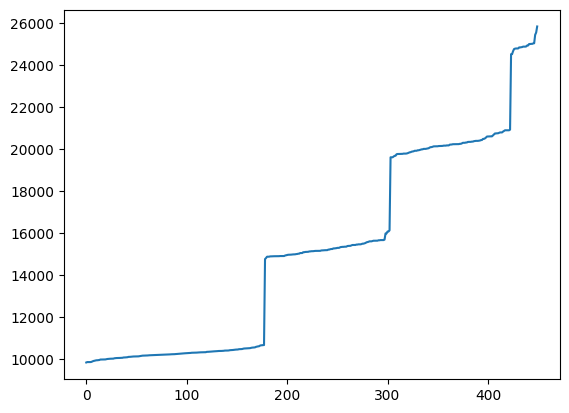

In [4]:
plt.plot(list(map(lambda s: s.score(),sma.good_solution_pool)))

In [5]:
sma.datacollector.get_model_vars_dataframe()

,best_solution,pool_size
0,NaN,0
1,10435.579538,3
2,10507.069401,6
3,10424.283253,9
4,10319.157515,12
...,...,...
145,9758.085225,435
146,9728.569950,438
147,9734.325321,441
148,9669.285013,444
